In [1]:
import os

import numpy
import pandas

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import scipy.signal
import scipy.stats

import seaborn

import accels_utils.frame_accels as FA

In [2]:
# Constants
MICHELSEN_FREQS = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000]
MICHELSEN_DISPLS = [8.5, 1.5, 0.8, 0.6, 0.5, 0.42, 0.4, 0.35, 0.3, 0.22, 0.17, 0.15, 0.15] # microns
MICHELSEN_SPEEDS = [x*2*3.14*MICHELSEN_FREQS[x_i]/1000 for x_i, x in enumerate(MICHELSEN_DISPLS)] # mm/s
MICHELSEN_ACCELS = [x*2*3.14*MICHELSEN_FREQS[x_i]/1000 for x_i, x in enumerate(MICHELSEN_SPEEDS)] # m/s/s

df_michelsen = pandas.DataFrame.from_dict({'frequency':MICHELSEN_FREQS, 'displacement':MICHELSEN_DISPLS, 'speed':MICHELSEN_SPEEDS, 'acceleration':MICHELSEN_ACCELS})
df_michelsen

,frequency,displacement,speed,acceleration
0,200,8.50,10.67600,13.409056
1,300,1.50,2.82600,5.324184
2,400,0.80,2.00960,5.048115
3,500,0.60,1.88400,5.915760
4,600,0.50,1.88400,7.098912
5,700,0.42,1.84632,8.116423
6,800,0.40,2.00960,10.096230
7,900,0.35,1.97820,11.180786
8,1000,0.30,1.88400,11.831520
9,1500,0.22,2.07240,19.522008


In [3]:
root_path = '/Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/'

data_folds = ['a0_x51_y50_w0/', 'a1_x141_y50_w0/', 'a2_x231_y50_w0/', 'a3_x321_y50_w0/', 'a4_x321_y150_w0/', 'a5_x231_y150_w0/', 'a6_x141_y150_w0/', 'a7_x51_y150_w0/']
data_paths = [root_path + fold for fold in data_folds]

accdata_path = root_path + 'accdata3200/'

files_params = []
for data_path in data_paths:
    data_path = data_path + 'csv_files/'
    files_list = sorted([x for x in os.listdir(data_path) if x.endswith('.csv')])
    print("Discovered {} files in {}".format(len(files_list), data_path))

    for f in files_list:
        fp = {}
        fp['filename']  = f
        fp['actuator']  = int(f.split('.')[0].split('_')[-4][1:])
        fp['frequency'] = int(f.split('.')[0].split('_')[-5][1:])
        fp['replicate'] = int(f.split('.')[0].split('_')[-6][1:])
        fp['x']         = int(f.split('.')[0].split('_')[-3][1:])
        fp['y']         = int(f.split('.')[0].split('_')[-2][1:])
        fp['wax']       = int(f.split('.')[0].split('_')[-1][1:])

        df = pandas.read_csv(data_path+f)
        fp['f_acq']     = 1/round(numpy.median(df['time'].values[1:]-df['time'].values[:-1]), 8)
        sig_fft         = numpy.fft.fft(df['CH1'].values-numpy.mean(df['CH1'].values))[0:int(len(df['CH1'].values)/2)]
        fre_fft         = numpy.fft.fftfreq(len(df['CH1'].values[1:]), 1/fp['f_acq'])[0:int(len(df['CH1'].values)/2)]
        peak_coeff      = numpy.argmax(numpy.abs(sig_fft))
        fp['computed_freq'] = fre_fft[peak_coeff]

        fp['V_to_mm_s'] = 5

        fp['ampl_V_pp']     = numpy.median(numpy.abs((scipy.signal.hilbert(df['CH1'].values))))*2
        fp['ampl_speed']    = fp['ampl_V_pp']*fp['V_to_mm_s'] # in mm/s
        fp['ampl_displ']    = fp['ampl_speed']/(2*3.14*fp['frequency'])*1000 # in microns
        fp['ampl_accel']    = fp['ampl_speed']*2*3.14*fp['frequency']/1000 # in m/s/s

        fp['Mich_speed']    = [spe for spe_i, spe in enumerate(MICHELSEN_SPEEDS) if MICHELSEN_FREQS[spe_i] == fp['frequency']]
        fp['Mich_displ']    = [spe for spe_i, spe in enumerate(MICHELSEN_DISPLS) if MICHELSEN_FREQS[spe_i] == fp['frequency']]
        fp['Mich_accel']    = [spe for spe_i, spe in enumerate(MICHELSEN_ACCELS) if MICHELSEN_FREQS[spe_i] == fp['frequency']]

        if fp['Mich_speed'] == []:
            fp['Mich_speed'] = None
    
        fp['data_path']     = data_path
        files_params.append(fp)

data = pandas.DataFrame.from_dict(files_params)
data

Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a0_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a1_x141_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a2_x231_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a3_x321_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a4_x321_y150_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a5_x231_y150_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a6_x141_y150_w0/csv_files/
Discovered 18 files in /U

,filename,actuator,frequency,replicate,x,y,wax,f_acq,computed_freq,V_to_mm_s,ampl_V_pp,ampl_speed,ampl_displ,ampl_accel,Mich_speed,Mich_displ,Mich_accel,data_path
0,capt_r0_f1000_a0_x51_y50_w0.csv,0,1000,0,51,50,0,5000000.0,1000.0100,5,1.087675,5.438375,0.865983,34.152995,[1.884],[0.3],[11.83152],/Users/matthieu/Documents/SurfaceVibMeasuremen...
1,capt_r0_f100_a0_x51_y50_w0.csv,0,100,0,51,50,0,2000000.0,100.0010,5,0.060791,0.303957,0.484008,0.190885,None,[],[],/Users/matthieu/Documents/SurfaceVibMeasuremen...
2,capt_r0_f1250_a0_x51_y50_w0.csv,0,1250,0,51,50,0,5000000.0,1250.0125,5,1.074562,5.372810,0.684434,42.176559,None,[],[],/Users/matthieu/Documents/SurfaceVibMeasuremen...
3,capt_r0_f1500_a0_x51_y50_w0.csv,0,1500,0,51,50,0,5000000.0,1500.0150,5,1.309608,6.548038,0.695121,61.682518,[2.0724],[0.22],[19.522008000000003],/Users/matthieu/Documents/SurfaceVibMeasuremen...
4,capt_r0_f1750_a0_x51_y50_w0.csv,0,1750,0,51,50,0,5000000.0,1750.0175,5,0.812922,4.064611,0.369846,44.670078,None,[],[],/Users/matthieu/Documents/SurfaceVibMeasuremen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,capt_r0_f500_a7_x51_y150_w0.csv,7,500,0,51,150,0,1000000.0,500.0050,5,0.378165,1.890825,0.602174,5.937190,[1.884],[0.6],[5.91576],/Users/matthieu/Documents/SurfaceVibMeasuremen...
140,capt_r0_f600_a7_x51_y150_w0.csv,7,600,0,51,150,0,1000000.0,600.0060,5,0.195409,0.977043,0.259300,3.681500,[1.884],[0.5],[7.0989119999999994],/Users/matthieu/Documents/SurfaceVibMeasuremen...
141,capt_r0_f700_a7_x51_y150_w0.csv,7,700,0,51,150,0,1000000.0,700.0070,5,0.145325,0.726625,0.165292,3.194244,[1.84632],[0.42],[8.116422720000001],/Users/matthieu/Documents/SurfaceVibMeasuremen...
142,capt_r0_f800_a7_x51_y150_w0.csv,7,800,0,51,150,0,1000000.0,800.0080,5,0.340445,1.702226,0.338819,8.551981,[2.0096000000000003],[0.4],[10.096230400000001],/Users/matthieu/Documents/SurfaceVibMeasuremen...


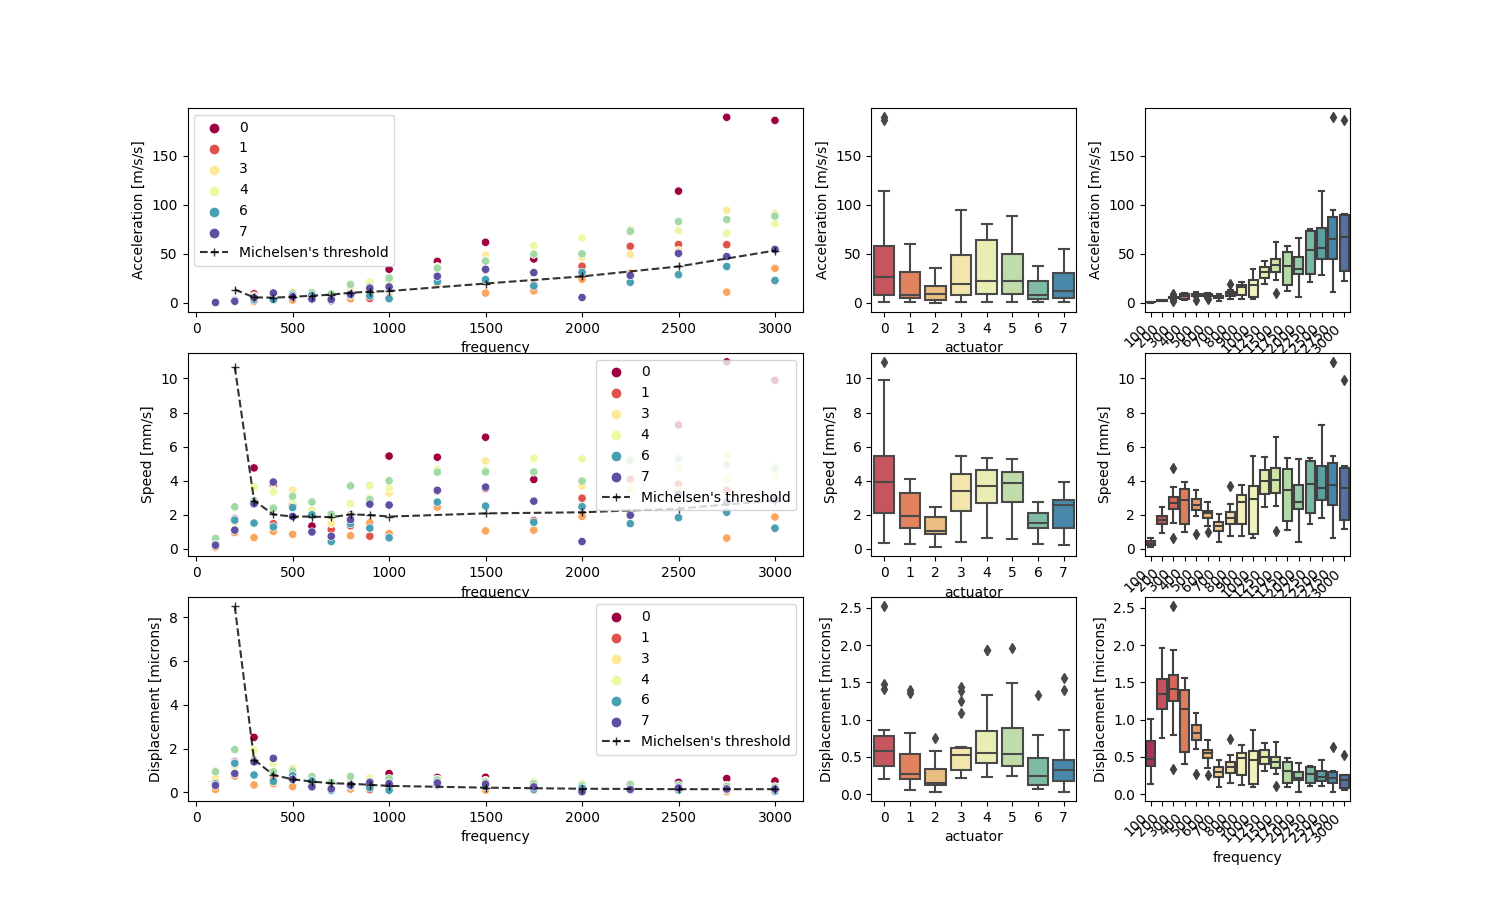

In [4]:
fig, ax = matplotlib.pyplot.subplots(3, 3, figsize=(15, 9), width_ratios=[60, 20, 20])

palette_used = 'Spectral'
seaborn.scatterplot(data=data, x='frequency', y='ampl_accel', hue='actuator', ax=ax[0,0], palette=palette_used)
seaborn.scatterplot(data=data, x='frequency', y='ampl_speed', hue='actuator', ax=ax[1,0], palette=palette_used)
seaborn.scatterplot(data=data, x='frequency', y='ampl_displ', hue='actuator', ax=ax[2,0], palette=palette_used)
_ = ax[0,0].plot(MICHELSEN_FREQS, MICHELSEN_ACCELS, '+k', linestyle='dashed', alpha=0.8, label="Michelsen's threshold")
_ = ax[1,0].plot(MICHELSEN_FREQS, MICHELSEN_SPEEDS, '+k', linestyle='dashed', alpha=0.8, label="Michelsen's threshold")
_ = ax[2,0].plot(MICHELSEN_FREQS, MICHELSEN_DISPLS, '+k', linestyle='dashed', alpha=0.8, label="Michelsen's threshold")

seaborn.boxplot(data=data, x='actuator', y='ampl_accel', ax=ax[0,1], palette=palette_used)
seaborn.boxplot(data=data, x='actuator', y='ampl_speed', ax=ax[1,1], palette=palette_used)
seaborn.boxplot(data=data, x='actuator', y='ampl_displ', ax=ax[2,1], palette=palette_used)

seaborn.boxplot(data=data, x='frequency', y='ampl_accel', ax=ax[0,2], palette=palette_used)
seaborn.boxplot(data=data, x='frequency', y='ampl_speed', ax=ax[1,2], palette=palette_used)
seaborn.boxplot(data=data, x='frequency', y='ampl_displ', ax=ax[2,2], palette=palette_used)

_ = ax[0,0].set_ylabel('Acceleration [m/s/s]')
_ = ax[1,0].set_ylabel('Speed [mm/s]')
_ = ax[2,0].set_ylabel('Displacement [microns]')

_ = ax[0,1].set_ylabel('Acceleration [m/s/s]')
_ = ax[1,1].set_ylabel('Speed [mm/s]')
_ = ax[2,1].set_ylabel('Displacement [microns]')

_ = ax[0,2].set_ylabel('Acceleration [m/s/s]')
_ = ax[1,2].set_ylabel('Speed [mm/s]')
_ = ax[2,2].set_ylabel('Displacement [microns]')

for i in range(3):
    _ = ax[i,2].set_xticklabels(ax[i,2].get_xticklabels(), rotation=45, ha='right')
    _ = ax[i,0].legend()

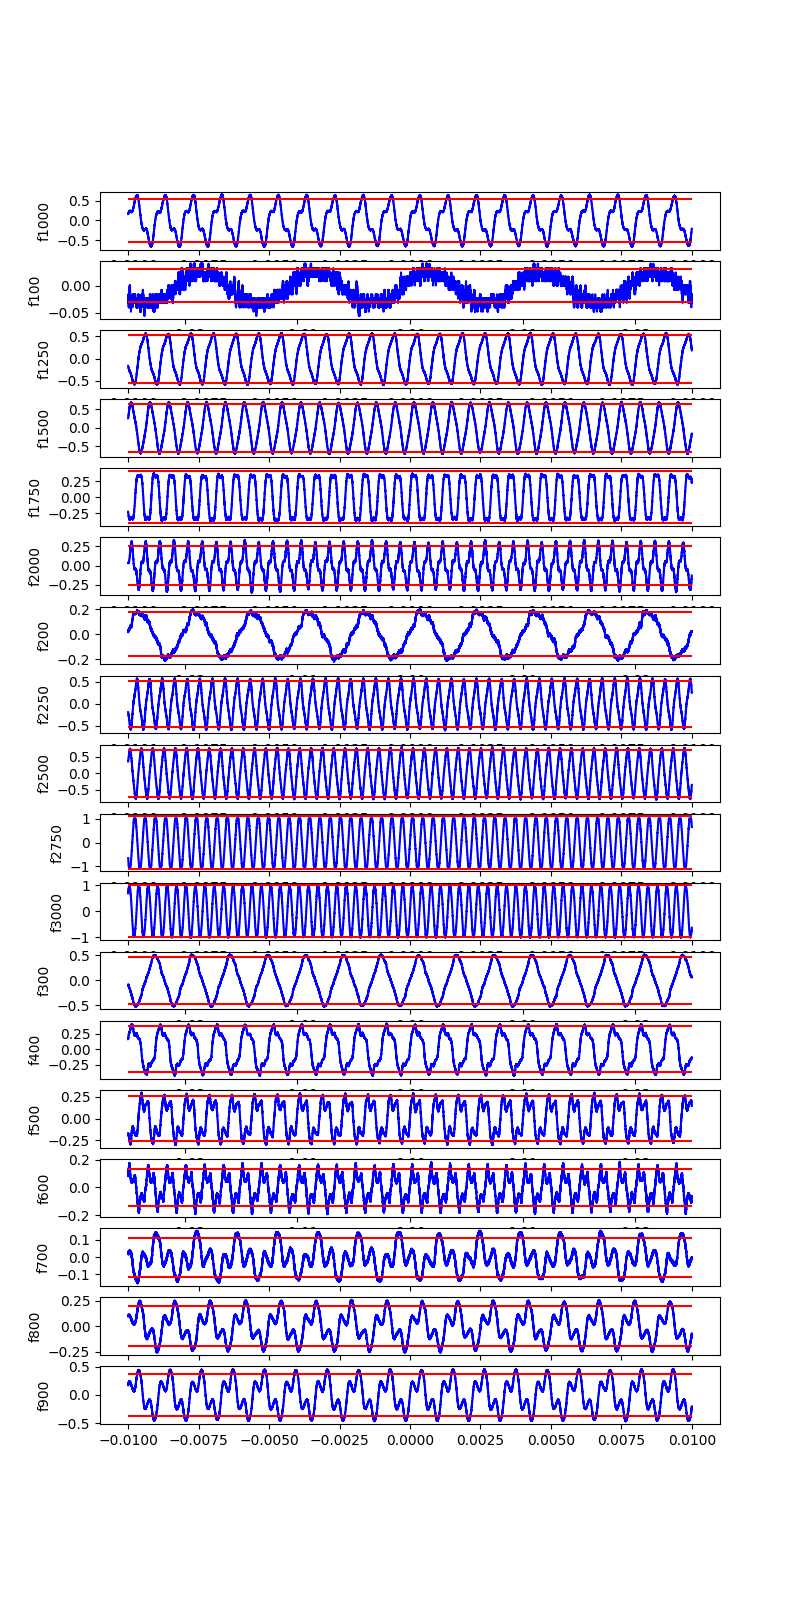

In [5]:
data_a0 = data[data.actuator == 0]
fig, ax = matplotlib.pyplot.subplots(18, 1, figsize=(8, 16))
for i, exp in data_a0.iterrows():
    f = exp.filename
    df = pandas.read_csv(exp.data_path+f)
    ax[i].plot(df['time'], df['CH1'], 'b')
    computed_amp = exp.ampl_V_pp
    ax[i].hlines([computed_amp/2, -computed_amp/2], df['time'].values[0], df['time'].values[-1], 'r')
    ax[i].set_ylabel('f{}'.format(exp.frequency))

In [6]:
# Butterworth lowpass and highpass filters --> V useful for analysis
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = scipy.signal.butter(order, cutoff, fs=fs, btype='low', analog=False)
    y = scipy.signal.lfilter(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = scipy.signal.butter(order, cutoff, fs=fs, btype='high', analog=False)
    y = scipy.signal.lfilter(b, a, data)
    return y

def butter_passband_filter(data, cutoff_low, cutoff_high, fs, order=5):
    interm = butter_lowpass_filter(data, cutoff_high, fs, order=order)
    return butter_highpass_filter(interm, cutoff_low, fs, order=order)

In [7]:
# tests with accelerometers
acc_files = sorted([x for x in os.listdir(accdata_path) if x.startswith('test') and x.endswith('.txt')])

# Constants
FREQ_TOLERANCE = 50
data_accel = []
for f in acc_files:
    dp = {'filename':f}
    try:
        with open(accdata_path + f) as accfile:
            dat = accfile.readlines()
        dp['data']            = FA.extract_data(dat)
        dp['frequency']       = int(f.split('.')[0].split('_')[-3][1:])
        dp['actuator']        = int(f.split('.')[0].split('_')[-2][1:])
        dp['accelerometer']   = int(f.split('.')[0].split('_')[-1][3:])
        # sig = butter_passband_filter(dp['data'][dp['accelerometer']]['Z']['val'], dp['frequency']-FREQ_TOLERANCE, dp['frequency']+FREQ_TOLERANCE, 1600, order=5)
        dp['ampl_accel']      = numpy.median(numpy.abs((scipy.signal.hilbert(dp['data'][dp['accelerometer']]['Z']['val']))))*2

        dp['ampl_speed']      = dp['ampl_accel']/(dp['frequency']*2*3.14)*1000
        dp['ampl_displ']      = dp['ampl_speed']/(dp['frequency']*2*3.14)*1000
    except : 
        print('There was a problem reading file {}'.format(accdata_path + f))
    data_accel.append(dp)
accdata = pandas.DataFrame.from_dict(data_accel)

  0%|          | 0/1503 [00:00<?, ?it/s]

100%|██████████| 1504/1504 [00:00<00:00, 12397.09it/s]


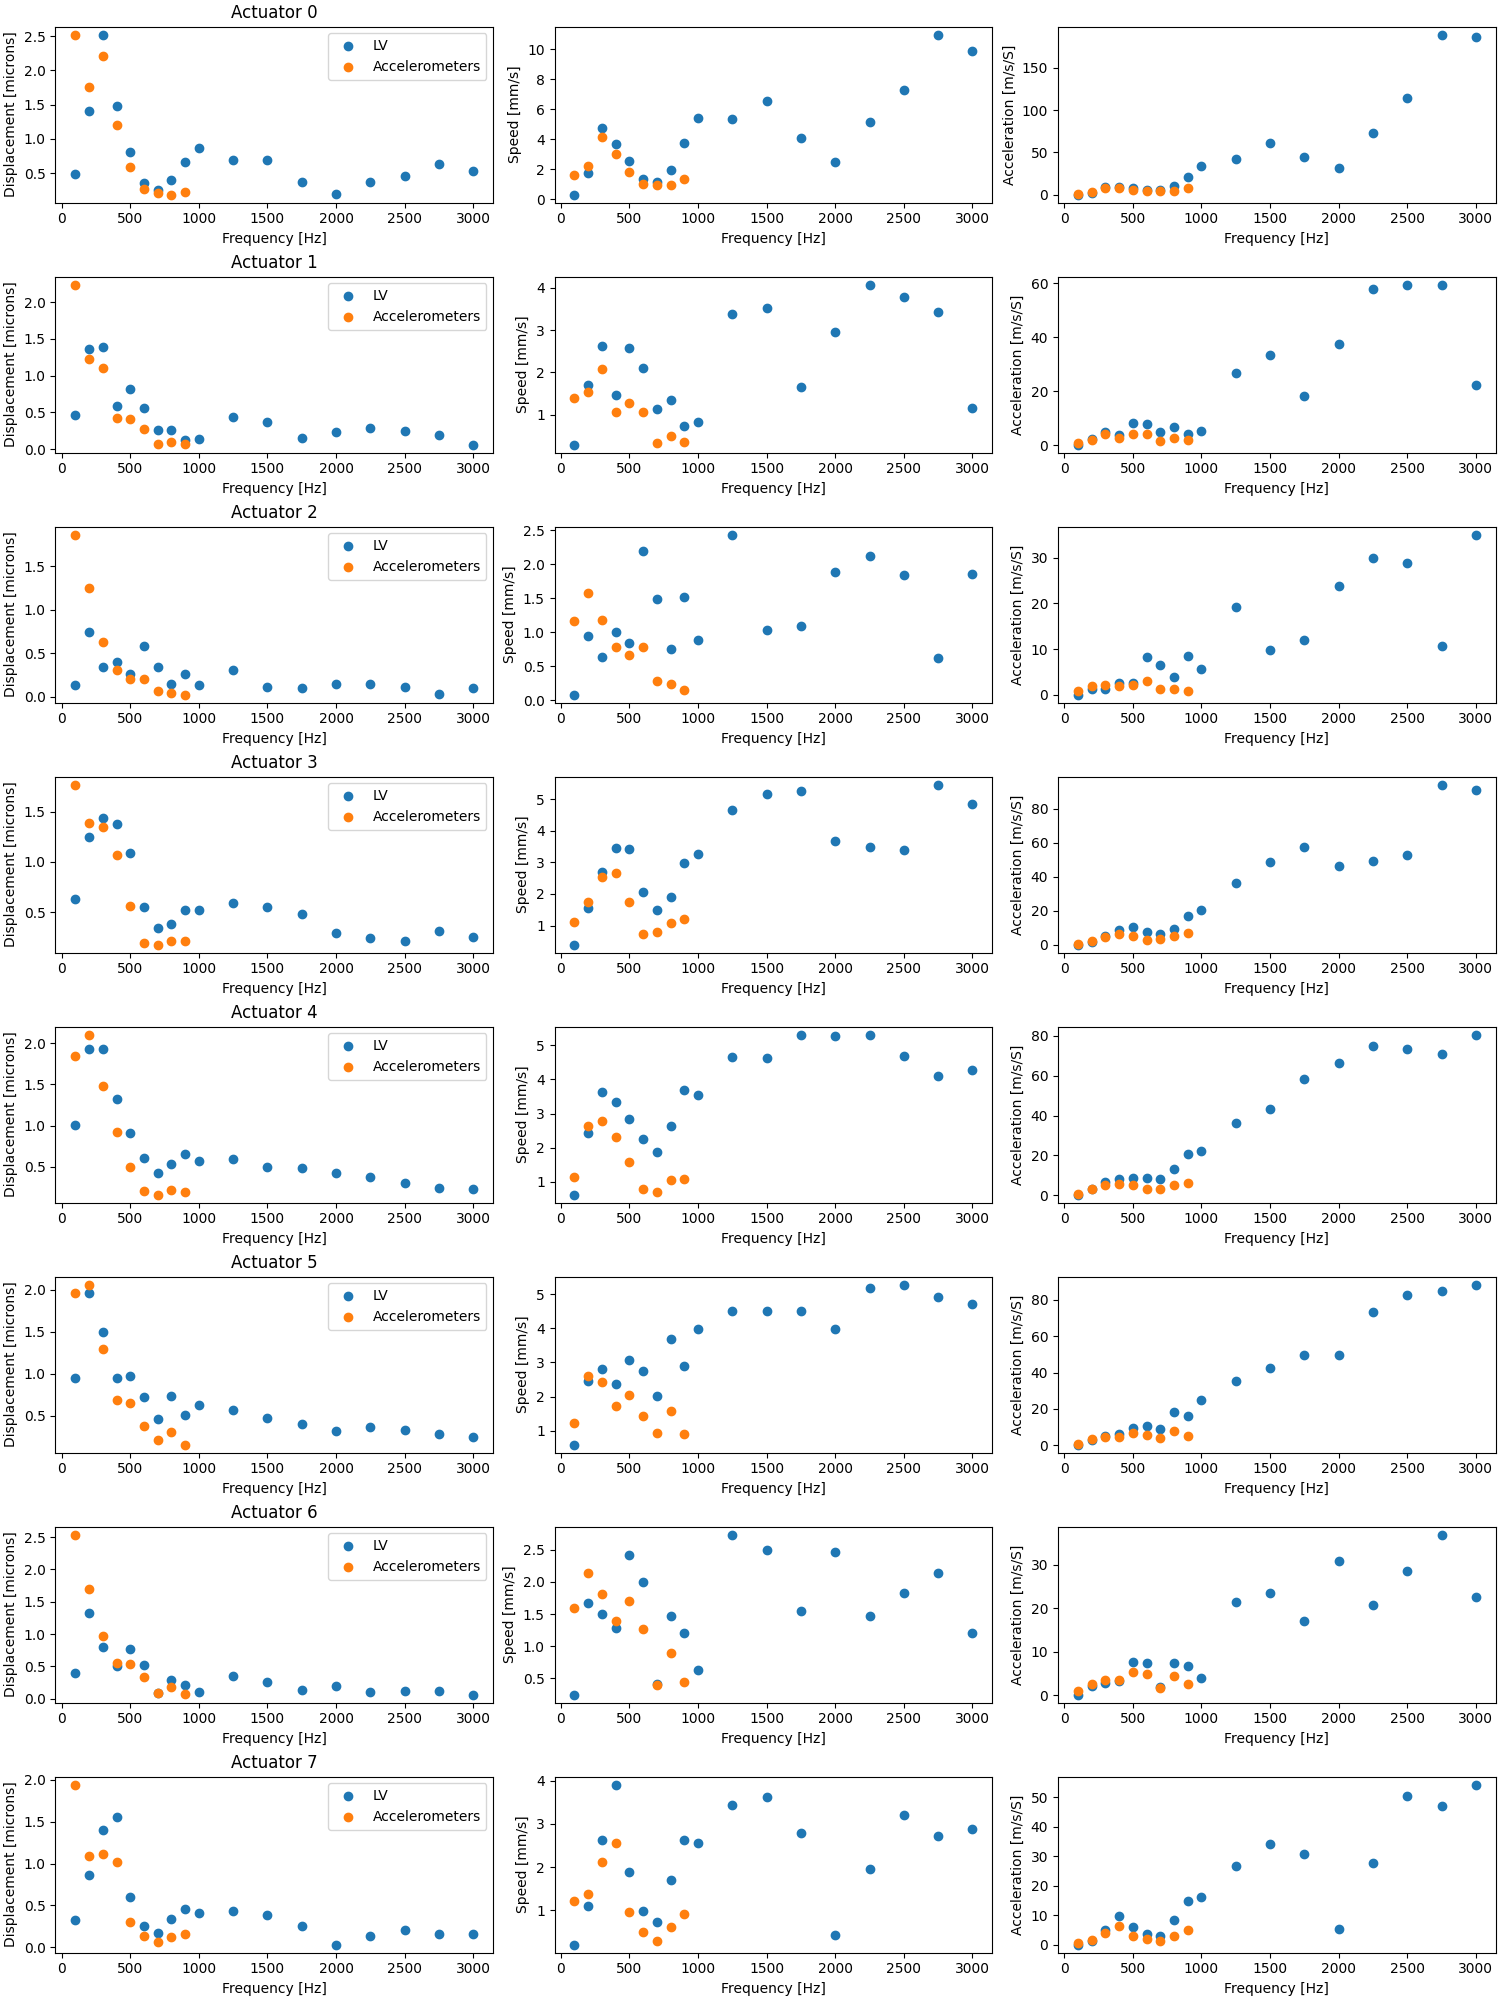

In [8]:
fig, ax = matplotlib.pyplot.subplots(8, 3, figsize=(15, 20), constrained_layout=True)
for i in range(8):
    act_of_interest = i
    act_data = data[data.actuator == act_of_interest]
    act_accdata = accdata[accdata.actuator == act_of_interest]

    _ = ax[i,0].scatter(act_data['frequency'], act_data['ampl_displ'], label='LV')
    _ = ax[i,0].scatter(act_accdata['frequency'], act_accdata['ampl_displ'], label='Accelerometers')

    _ = ax[i,1].scatter(act_data['frequency'], act_data['ampl_speed'], label='LV')
    _ = ax[i,1].scatter(act_accdata['frequency'], act_accdata['ampl_speed'], label='Accelerometers')

    _ = ax[i,2].scatter(act_data['frequency'], act_data['ampl_accel'], label='LV')
    _ = ax[i,2].scatter(act_accdata['frequency'], act_accdata['ampl_accel'], label='Accelerometers')

    _ = ax[i,0].title.set_text('Actuator {}'.format(act_of_interest))
    _ = ax[i,0].set_ylabel('Displacement [microns]')
    _ = ax[i,1].set_ylabel('Speed [mm/s]')
    _ = ax[i,2].set_ylabel('Acceleration [m/s/S]')

    _ = ax[i,0].set_xlabel('Frequency [Hz]')
    _ = ax[i,1].set_xlabel('Frequency [Hz]')
    _ = ax[i,2].set_xlabel('Frequency [Hz]')

    _ = ax[i,0].legend()

In [9]:
MICHELSEN_SPEEDS

[10.676,
 2.826,
 2.0096000000000003,
 1.884,
 1.884,
 1.84632,
 2.0096000000000003,
 1.9782,
 1.884,
 2.0724,
 2.1352,
 2.355,
 2.826]

In [10]:
MICHELSEN_FREQS

[200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000]

In [11]:
data

,filename,actuator,frequency,replicate,x,y,wax,f_acq,computed_freq,V_to_mm_s,ampl_V_pp,ampl_speed,ampl_displ,ampl_accel,Mich_speed,Mich_displ,Mich_accel,data_path
0,capt_r0_f1000_a0_x51_y50_w0.csv,0,1000,0,51,50,0,5000000.0,1000.0100,5,1.087675,5.438375,0.865983,34.152995,[1.884],[0.3],[11.83152],/Users/matthieu/Documents/SurfaceVibMeasuremen...
1,capt_r0_f100_a0_x51_y50_w0.csv,0,100,0,51,50,0,2000000.0,100.0010,5,0.060791,0.303957,0.484008,0.190885,None,[],[],/Users/matthieu/Documents/SurfaceVibMeasuremen...
2,capt_r0_f1250_a0_x51_y50_w0.csv,0,1250,0,51,50,0,5000000.0,1250.0125,5,1.074562,5.372810,0.684434,42.176559,None,[],[],/Users/matthieu/Documents/SurfaceVibMeasuremen...
3,capt_r0_f1500_a0_x51_y50_w0.csv,0,1500,0,51,50,0,5000000.0,1500.0150,5,1.309608,6.548038,0.695121,61.682518,[2.0724],[0.22],[19.522008000000003],/Users/matthieu/Documents/SurfaceVibMeasuremen...
4,capt_r0_f1750_a0_x51_y50_w0.csv,0,1750,0,51,50,0,5000000.0,1750.0175,5,0.812922,4.064611,0.369846,44.670078,None,[],[],/Users/matthieu/Documents/SurfaceVibMeasuremen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,capt_r0_f500_a7_x51_y150_w0.csv,7,500,0,51,150,0,1000000.0,500.0050,5,0.378165,1.890825,0.602174,5.937190,[1.884],[0.6],[5.91576],/Users/matthieu/Documents/SurfaceVibMeasuremen...
140,capt_r0_f600_a7_x51_y150_w0.csv,7,600,0,51,150,0,1000000.0,600.0060,5,0.195409,0.977043,0.259300,3.681500,[1.884],[0.5],[7.0989119999999994],/Users/matthieu/Documents/SurfaceVibMeasuremen...
141,capt_r0_f700_a7_x51_y150_w0.csv,7,700,0,51,150,0,1000000.0,700.0070,5,0.145325,0.726625,0.165292,3.194244,[1.84632],[0.42],[8.116422720000001],/Users/matthieu/Documents/SurfaceVibMeasuremen...
142,capt_r0_f800_a7_x51_y150_w0.csv,7,800,0,51,150,0,1000000.0,800.0080,5,0.340445,1.702226,0.338819,8.551981,[2.0096000000000003],[0.4],[10.096230400000001],/Users/matthieu/Documents/SurfaceVibMeasuremen...


/Users/matthieu/.pyenv/versions/3.9.15/envs/default_conf/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/matthieu/.pyenv/versions/3.9.15/envs/default_conf/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/matthieu/.pyenv/versions/3.9.15/envs/default_conf/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/matthieu/.pyenv/versions/3.9.15/envs/default_conf/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  pl

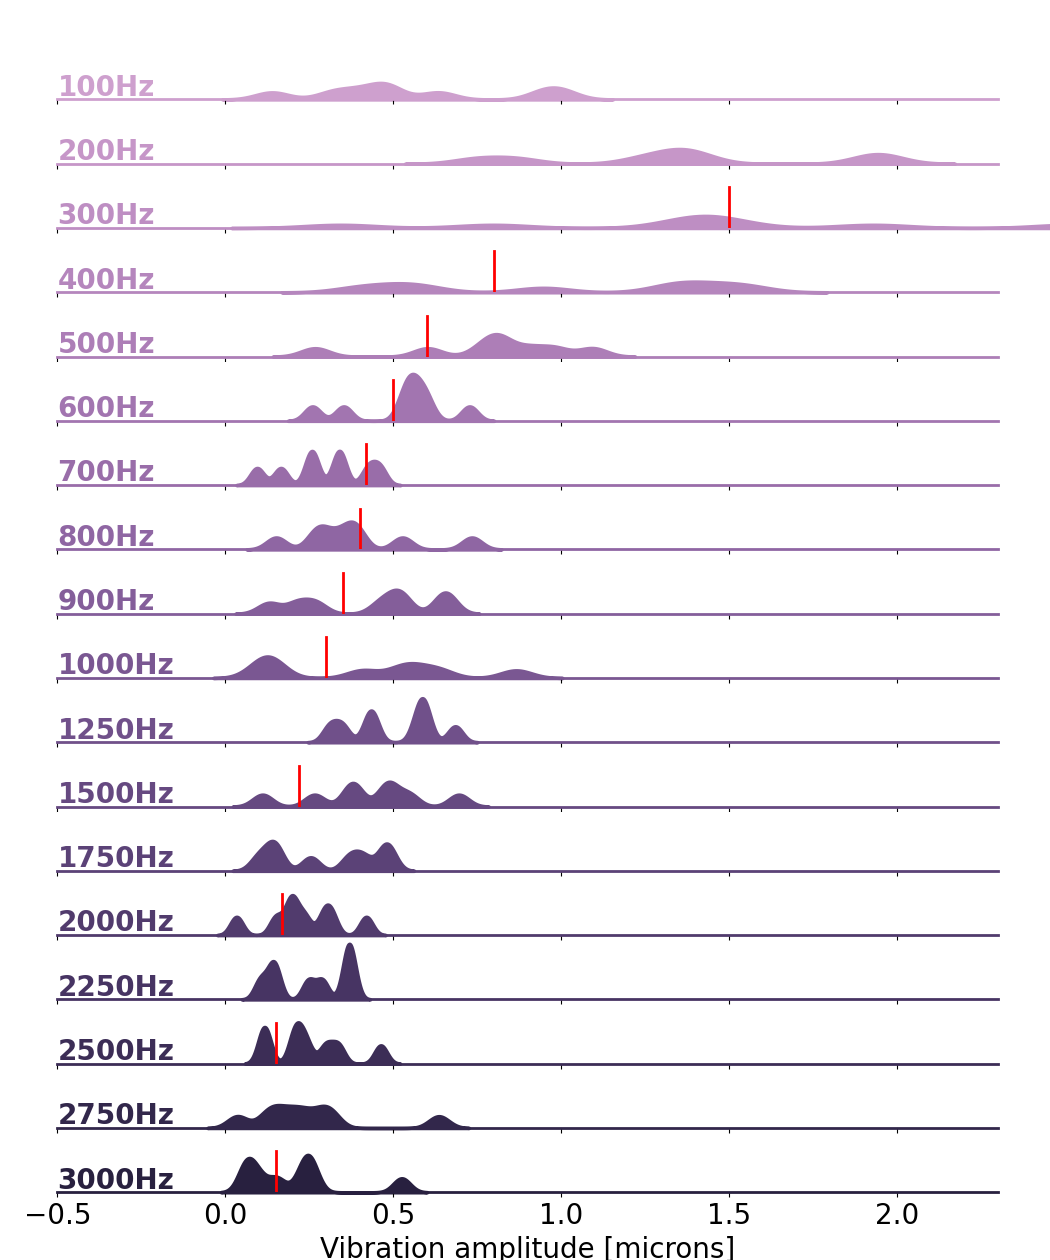

In [12]:
df = data
freq_order = [100,200,300,400,500,600,700,800,900,1000,1250,1500,1750,2000,2250,2500,2750,3000]

matplotlib.rcParams.update({'font.size': 20})

# Initialize the FacetGrid object
pal = seaborn.cubehelix_palette(len(freq_order), rot=.2, light=.7)
g = seaborn.FacetGrid(df, row="frequency", hue="frequency", hue_order=freq_order, aspect=15, height=.7, palette=pal)

# Draw the densities in a few steps
g.map(seaborn.kdeplot, "ampl_displ",
      bw_adjust=.25, clip_on=False,
      fill=True, alpha=1, linewidth=2.5)
# g.map(seaborn.kdeplot, "ampl_displ", clip_on=False, color="w", lw=2, bw_adjust=.5, cut=0)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)



# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = matplotlib.pyplot.gca()
    ax.text(0, .2, label+'Hz', fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "ampl_displ")
g.set(xlim=(-0.5, 2.3))

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)

# Add Michelsen
for ax_key in list(g.axes_dict.keys()):
    ax = g.axes_dict[ax_key]
    if ax_key in MICHELSEN_FREQS:
        mich_displ = [spe for spe_i, spe in enumerate(MICHELSEN_DISPLS) if MICHELSEN_FREQS[spe_i] == ax_key]
        ax.plot([mich_displ, mich_displ], [0, 0.7*ax.get_ylim()[1]], c='r', linewidth=2)
    if ax_key == 3000:
        ax.set_xlabel("Vibration amplitude [microns]")

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [13]:
# fig, ax = matplotlib.pyplot.subplots(3, 1, figsize=(5, 15))
# ax[0].semilogy(MICHELSEN_FREQS, MICHELSEN_ACCELS, ':+')
# ax[1].semilogy(MICHELSEN_FREQS, MICHELSEN_SPEEDS, ':+')
# ax[2].semilogy(MICHELSEN_FREQS, MICHELSEN_DISPLS, ':+')
# ax[0].set_ylim([1, 100])
# ax[1].set_ylim([1, 12])
# ax[2].set_ylim([0.1, 10])
# ax[0].grid()
# ax[1].grid()
# ax[2].grid()